In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
# Display the first few rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **#1.Data Processing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Drop the 'Cabin' column and the 'Name' column (not useful for prediction)
titanic_data = titanic_data.drop(columns=['Cabin', 'Name', 'Ticket'])

In [ ]:
# Handle missing values for 'Age' and 'Embarked'
imputer_age = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer_age.fit_transform(titanic_data[['Age']])

In [ ]:
imputer_embarked = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = imputer_embarked.fit_transform(titanic_data[['Embarked']])

In [ ]:
# Encode categorical variables
label_encoder_sex = LabelEncoder()
titanic_data['Sex'] = label_encoder_sex.fit_transform(titanic_data['Sex'])

In [ ]:
label_encoder_embarked = LabelEncoder()
titanic_data['Embarked'] = label_encoder_embarked.fit_transform(titanic_data['Embarked'])

In [ ]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Display the preprocessed data
X_train.head(), y_train.head()

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 331       1    1  45.5      0      0  28.5000         2
 733       2    1  23.0      0      0  13.0000         2
 382       3    1  32.0      0      0   7.9250         2
 704       3    1  26.0      1      0   7.8542         2
 813       3    0   6.0      4      2  31.2750         2,
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64)

# **# 2.Model Building**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [38]:
# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predict on the test set
y_pred = model.predict(X_test)

In [34]:
 #Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [36]:
accuracy, report, conf_matrix

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n',
 array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]))

In [35]:
# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [42]:
!pip install matplotlib seaborn scikit-learn


In [60]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

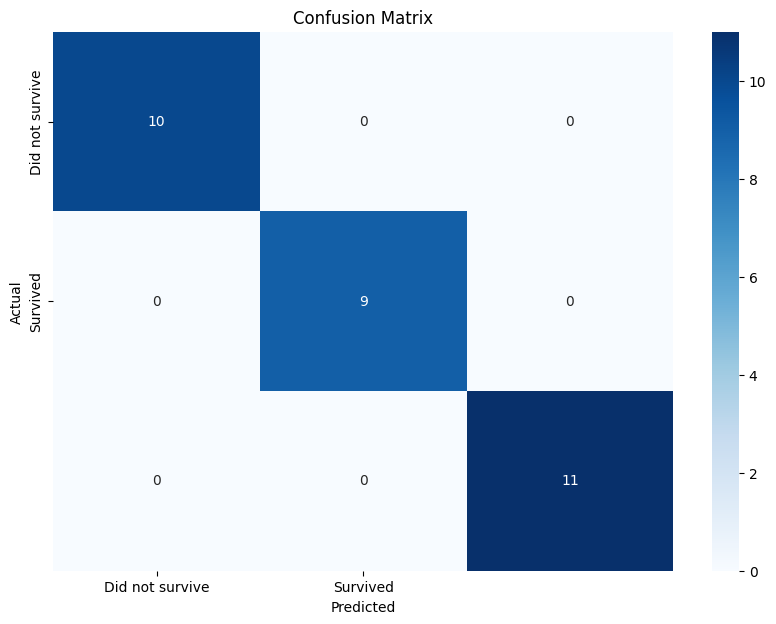

In [48]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


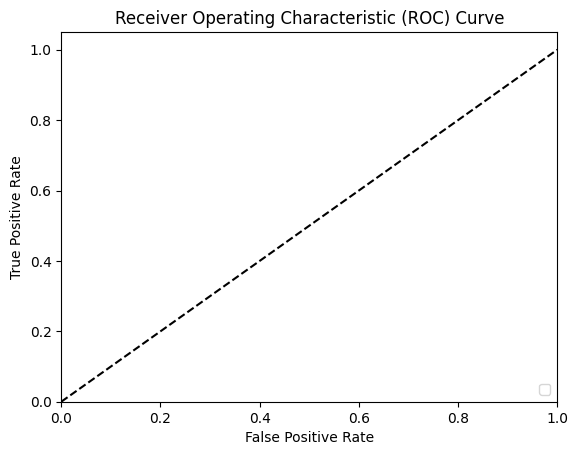

In [61]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting feature importance
importances = model.feature_importances_
# Assuming X is a NumPy array, use a list comprehension to get the column names
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)